In [18]:
import random

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
from matplotlib.animation import FuncAnimation

### Create dataset to fit a line

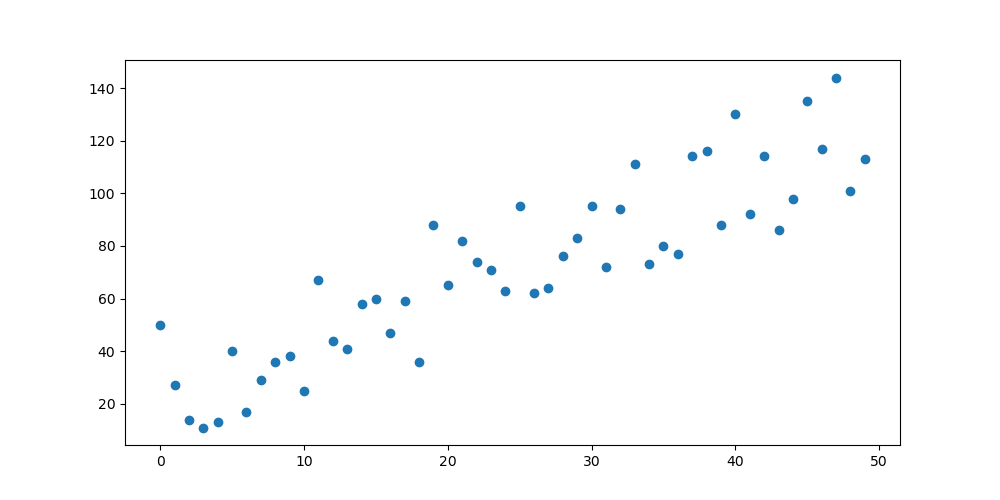

In [19]:
# Define number of dataset points
x_range = 50

# Create linspaced x
x = [x for x in range(x_range)]

# Create dataset points
y_true = [2*x + (5*random.randint(0, 10)) for x in range(x_range)]

# Plot dataset
fig = plt.figure(figsize=(10,5))
plt.scatter(x, y_true)
plt.show()

### Loss function - MSE

The cost function is needed in linear regression to quantify the difference between the predicted values and the actual values of the target variable, allowing us to measure the accuracy of the model's predictions. By minimizing the cost function, we can find the optimal values for the model's parameters and achieve the best possible fit to the data.

$$ C(w,b) = \frac{1}{N} \sum_{i=1}^{N}(y_{i}- (w*x + b))^2$$


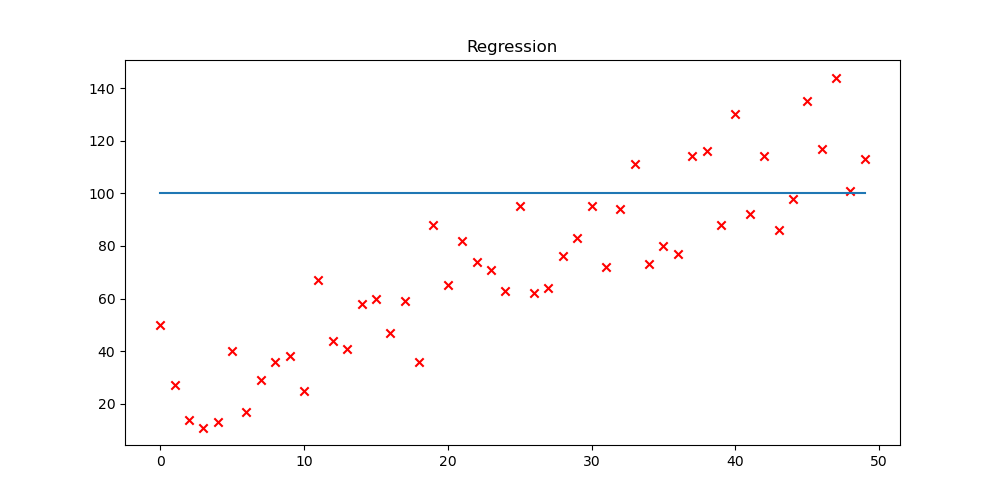

In [20]:
# Calculate predicted line
def prediction(w, b):
    y_predicted = [w*x+b for x in x]
    return y_predicted

# Calculate loss
def loss_fn(y_true, y_predicted):
    loss = [(y_predicted[idx] - y_true[idx])**2 for idx in range(x_range)]
    return sum(loss) / (x_range)

# Define (w,b) parameters
w, b = 0, 100

# Calculate predicted y values for initiated parameters (w, b)
y_init = prediction(w, b)

# Calculate loss value
loss = loss_fn(y_true, y_init)

# Plot dataset and initial line
fig, axs = plt.subplots(1, figsize=(10,5))
axs.set_title('Regression')
axs.scatter(x, y_true, color='r', marker='x')
axs.plot(x, y_init)

### Partial derivatives of cost function

Partial derivatives are needed in linear regression to compute the gradients of the cost function with respect to the model's parameters. These gradients indicate the direction and magnitude of the steepest ascent or descent, enabling the optimization algorithm to iteratively update the parameters and minimize the cost function to find the best-fit line.

$$\frac{\partial f}{\partial w} = \frac{1}{N}\sum_{i=1}^{N} -2x(y_{i}- (wx_{i} + b))$$

$$\frac{\partial f}{\partial b} = \frac{1}{N}\sum_{i=1}^{N} -2(y_{i}- (wx_{i} + b))$$

In [21]:
def loss_derivatives():
    d_w = sum([((w*x+b) - y_true[x]) * x for x in x])/len(x)
    d_b = sum([((w*x+b) - y_true[x]) for x in x])/len(x)
    return d_w, d_b

def update_parameters(w, b, d_w, d_b):
    w_change = d_w * lr
    b_change = d_b * lr
    w = w - w_change
    b = b - b_change
    return w, b

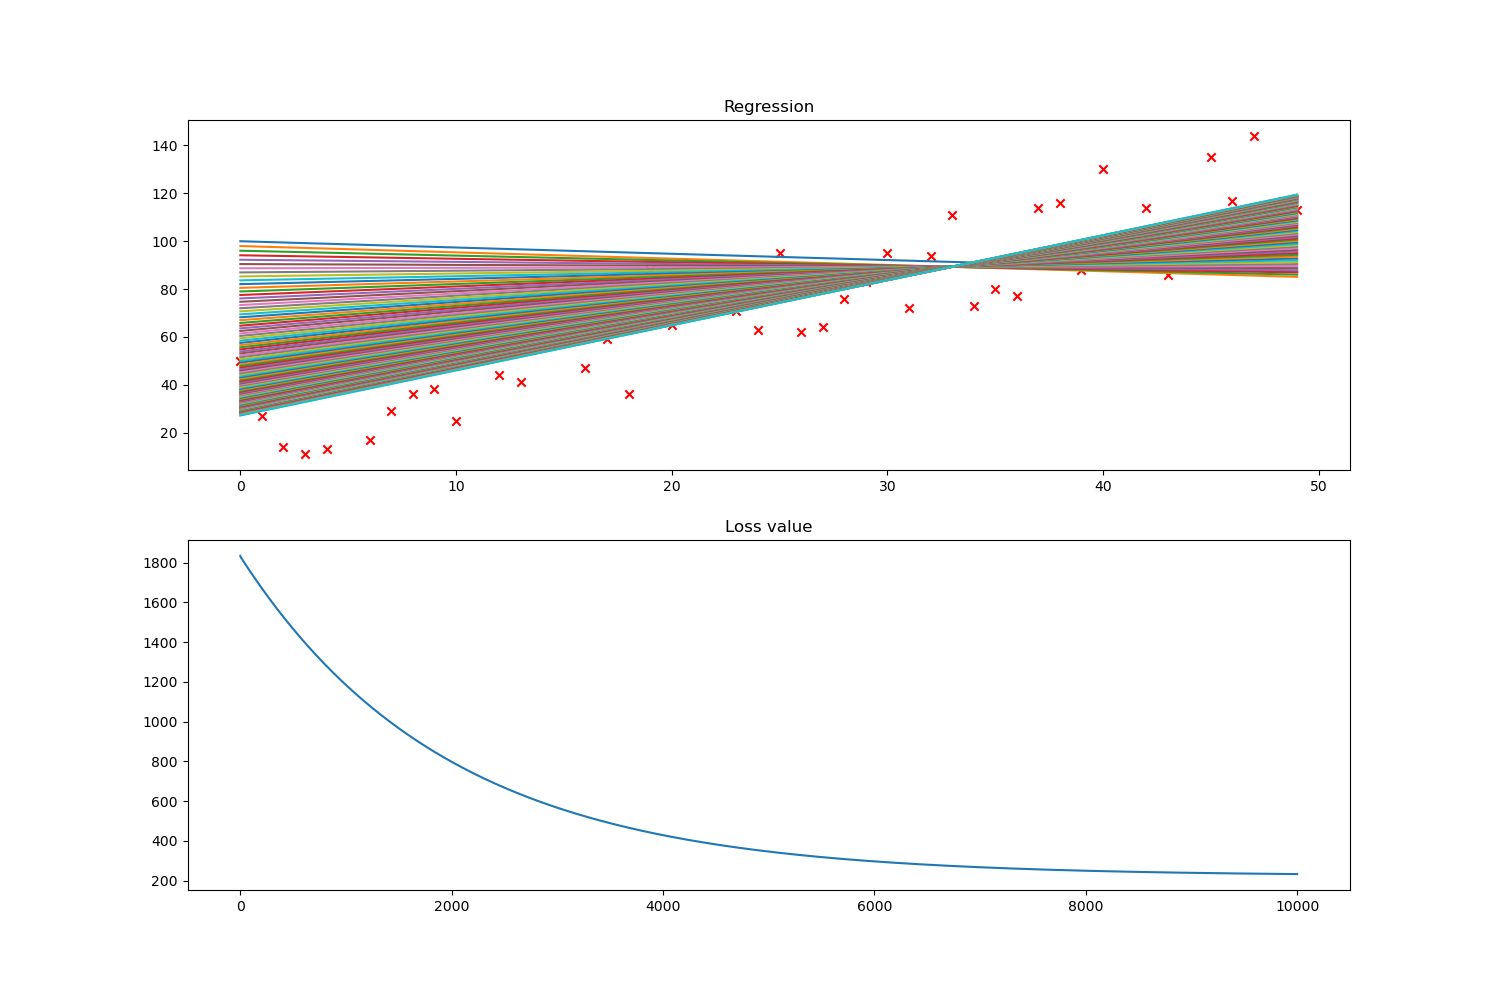

In [22]:
# Define hyperparameters
lr = 0.001
epochs = 10000

fig, axs = plt.subplots(2, figsize=(15,10))
axs[0].set_title('Regression')
axs[1].set_title('Loss value')


y_predicted = []
loss = []
for i in range(epochs):
    d_w, d_b = loss_derivatives()
    w, b = update_parameters(w, b, d_w, d_b)
    y_pred = prediction(w, b)
    loss_item = loss_fn(y_true, y_pred)
    loss.append(loss_item)
    if i%100 == 0:
        y_predicted.append(y_pred)
        axs[0].plot(x, y_pred)

axs[0].scatter(x, y_true, color='r', marker="x")
axs[1].plot(loss)


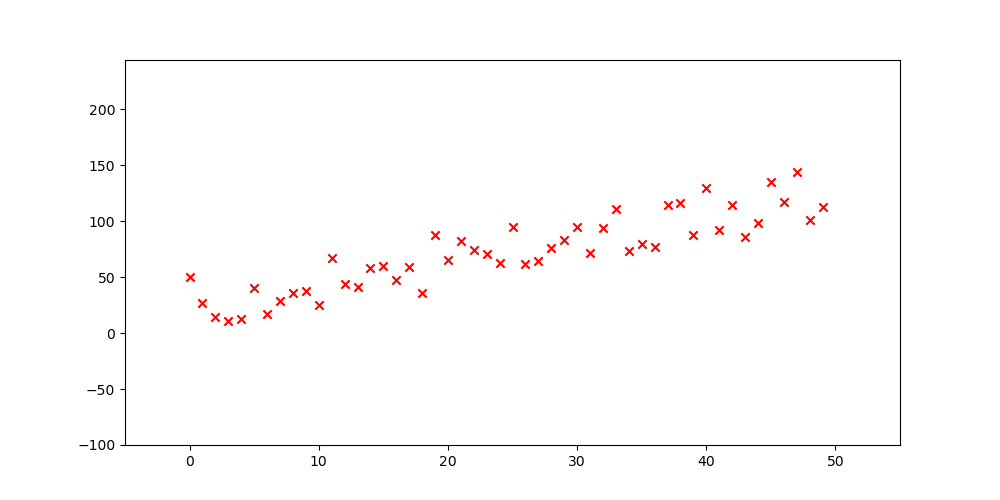

In [23]:
%matplotlib ipympl


fig = plt.figure(figsize=(10,5))
ax = plt.axes(xlim=(-5, x_range+5), ylim=(-100, max(y_true)+100))
line, = ax.plot([], [], lw=2)
ax.scatter(x, y_true, color='r', marker='x')


def init():
    line.set_data([], [])
    return line

def animate(i): 
    line.set_data(x, y_predicted[i])
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(y_predicted), interval=10, blit=True)
